In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
datas = os.listdir("../Crowdsource copy/crowdsource/crowdsource/csdata/data1")
dir_data = "../Crowdsource copy/crowdsource/crowdsource/csdata/data1/"+datas[0]
dir_data

'../Crowdsource copy/crowdsource/crowdsource/csdata/data1/DC22eokxf_crowdsource_rs.csv'

In [7]:
df = pd.read_csv(dir_data)
df.columns = ['index', 'x', 'y', 'flux', 'deltx', 'delty', 'chi2_', 'dx', 'dy',
       'dflux', 'qf', 'rchi2', 'fracflux', 'fluxlbs', 'dfluxlbs', 'fwhm',
       'spread_model', 'dspread_model', 'fluxiso', 'xiso', 'yiso', 'sky',
       'BADIM FLAG', 'BADFIT FLAG', 'FAILED FIT', 'FIT CHI2',
       'APERTURE RADIUS', 'QUALITY FLAG', 'STDEV FLAG', 'RELERR FLAG',
       'ref_fn', 'forced_fn', 'fn_index', 's', 'seeing', 'magzp', 'band',
       'candidate_id', 'MJD', 'resim_']

In [9]:
df = df.iloc[np.where(df.band=="g")]
df = df.iloc[np.where((df["QUALITY FLAG"]>3))]
df = df.iloc[np.where((df["QUALITY FLAG"]<6))]
df = df.iloc[np.where((df["RELERR FLAG"]==0))]
df = df.iloc[np.where((df["chi2_"]<120))]
df = df.iloc[np.where((df["magzp"]!=0))]
df = df.iloc[np.where((df["seeing"]!=0))]
#df = df.iloc[np.where(((df["flux"]/df["dflux"])<0.2))]
# dfn = dfn.iloc[np.where((dfn["seeing"]>1))]
df["normflux"] = df["flux"]*(10**((df["magzp"]-29)/2.5))
df["dnormflux"] = df["dflux"]*(10**((df["magzp"]-29)/2.5))
df = df.iloc[np.where((df["dnormflux"]/df["normflux"])<0.2)]
df = df.iloc[np.where(df["normflux"]<50000)]
df = df.sort_values("MJD")
df = df.reset_index()

In [10]:
df

,level_0,index,x,y,flux,deltx,delty,chi2_,dx,dy,...,fn_index,s,seeing,magzp,band,candidate_id,MJD,resim_,normflux,dnormflux
0,284,0,16.702758,15.522884,7750.015137,-0.138246,-0.106884,33.202772,0.407668,0.403148,...,302,15,1.286780,29.643635,g,DC22eokxf,59295.384410,[[-1.72849350e+01 1.91598282e+01 -1.39714050e...,14020.277478,2462.368698
1,269,0,15.866967,15.129282,8541.306641,-0.172963,-0.102182,31.103775,0.377937,0.366677,...,287,15,1.202713,29.639124,g,DC22eokxf,59295.388149,[[-8.05695343e+00 2.54960785e+01 -3.21421814e...,15387.710278,2511.331569
2,279,0,16.698566,15.508478,9198.387695,-0.148958,-0.101992,42.425596,0.351772,0.345523,...,297,15,1.179602,29.637720,g,DC22eokxf,59295.391910,[[-1.04088211e+01 1.11433411e+01 -4.35919952e...,16550.057765,2534.345862
3,282,0,16.899334,15.764242,7276.283691,-0.146977,-0.099910,31.438759,0.443918,0.433962,...,300,15,1.331029,29.642897,g,DC22eokxf,59295.397104,[[-1.93878937e+00 9.48197937e+00 4.38304901e...,13154.322020,2461.625427
4,281,0,16.636170,15.686310,8161.482910,-0.160474,-0.115821,55.668492,0.408855,0.405966,...,299,15,1.282140,29.642246,g,DC22eokxf,59295.400819,[[-1.44699402e+01 7.01345062e+00 6.84712982e...,14745.774394,2577.560895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,16,0,16.072450,15.065553,8711.168945,-0.171267,-0.118816,46.636224,0.368328,0.355780,...,17,15,1.149289,29.664277,g,DC22eokxf,59739.303483,[[-1.86451721e+00 1.08196106e+01 -7.00008392e...,16061.540950,2563.138885
59,39,0,16.504157,15.997713,7675.234863,-0.138864,-0.096327,33.126981,0.407702,0.409221,...,40,15,1.298733,29.677761,g,DC22eokxf,59764.181328,[[-1.81473541e+01 1.88532562e+01 1.32248688e...,14328.349092,2529.737312
60,35,0,16.206051,15.076862,8617.985352,-0.143747,-0.086272,38.093769,0.375840,0.369374,...,36,15,1.212041,29.660837,g,DC22eokxf,59764.185229,[[-2.11292343e+01 -3.53083801e+00 2.20123825e...,15839.467086,2579.094069
61,34,0,16.201482,15.469207,9310.273438,-0.151873,-0.077176,43.184339,0.347596,0.336010,...,35,15,1.161323,29.673583,g,DC22eokxf,59764.188950,[[-4.78656082e+01 1.13489380e+01 2.46657410e...,17313.924568,2618.840464


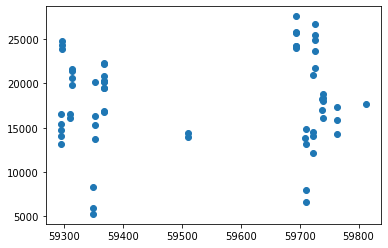

In [11]:
plt.scatter(df["MJD"], df["normflux"])

In [14]:
def expmjd_model(mjd, flux, exp):
    midind = np.where(np.sort(mjd - np.min(mjd))<((np.max(mjd) - np.min(mjd))/2))[0][-1]
    t1 = np.sort(mjd - np.min(mjd))
    f1 = np.zeros(len(mjd))
    f1[:midind] = ((exp**(-1*t1[:midind])))
    t1[:midind] = -1*(t1[:midind]) + max(t1[:midind])
    f1[midind:] = exp**(-1*(t1[midind:] - np.min(t1[midind:])))
    f1 = f1/min(f1)
    return t1 + np.min(mjd), f1*flux

def get_exp(mjd, maxamp):
    midind = np.where(np.sort(mjd - np.min(mjd))<((np.max(mjd) - np.min(mjd))/2))[0][-1]
    t1 = np.sort(mjd - np.min(mjd))
    return np.exp(np.log(maxamp)/((-1*np.min(-1*(t1[midind:] - np.min(t1[midind:]))))))

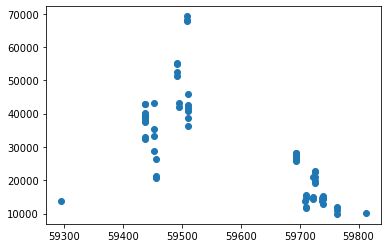

In [15]:
myt, myf = expmjd_model(df["MJD"], df["flux"], get_exp(df["MJD"], 5))
plt.scatter(myt, myf)

In [19]:
def adjacency_matrix(numbins, f):
    # numbins = 4
    numbins = numbins + 1
    bins = np.linspace(min(f), max(f)+0.001, numbins)
    am = np.zeros((numbins, numbins))
    distm = np.zeros((numbins, numbins))
    countm = np.zeros((numbins, numbins))
    for counti, i in enumerate(f[:]):
        ibin = np.where(bins>i)[0][0]
        for countj, j in enumerate(f[counti:]):
            if counti==countj:
                continue
            jbin = np.where(bins>j)[0][0]
            countm[ibin-1, jbin-1] += 1
            distm[ibin-1, jbin-1] += abs(x[counti] - x[countj])
            am[ibin-1, jbin-1] += 1/abs(x[counti] - x[countj])

    return countm[:-1,:-1], distm[:-1,:-1], am[:-1,:-1]

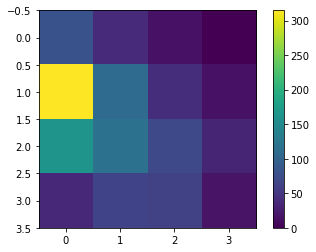

In [23]:
_, _, am = adjacency_matrix(4, myf)
plt.imshow(am)
plt.colorbar()